#### Predicting customer satisfaction based on their text reviews
data source: https://www.kaggle.com/sid321axn/amazon-alexa-reviews/kernels

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [93]:
reviews_df =pd.read_csv("amazon_alexa.tsv", sep = '\t')


In [94]:
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [95]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [96]:
reviews_df.dropna(inplace=True)

In [97]:
reviews_df.describe()

,rating,feedback
count,3149.000000,3149.000000
mean,4.463957,0.918704
std,1.067773,0.273332
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


## Exploring the data

<Axes: >

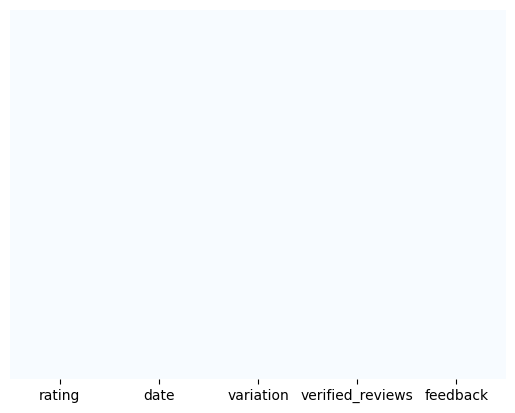

In [99]:
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

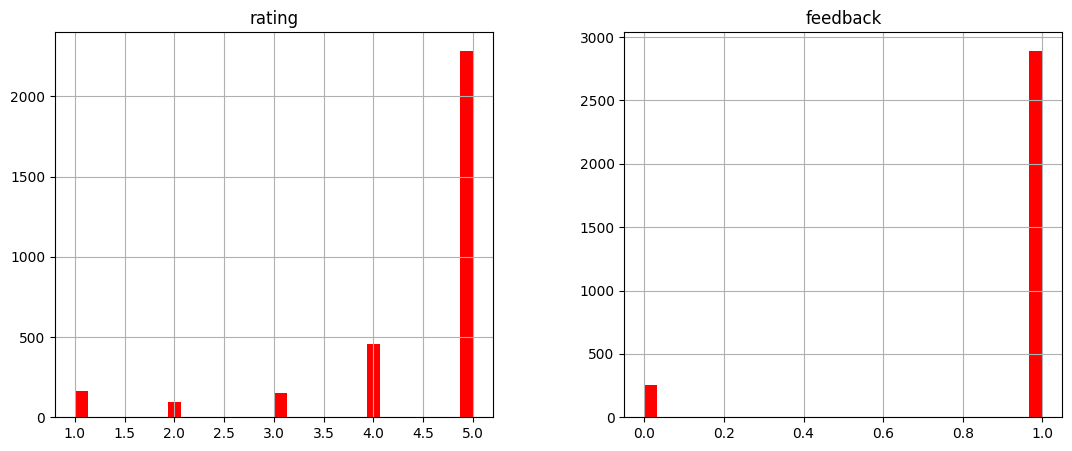

In [100]:
reviews_df.hist(bins= 30, figsize= (13,5), color='r')

In [101]:
# Let's get the length of the messages

reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


<Axes: ylabel='Frequency'>

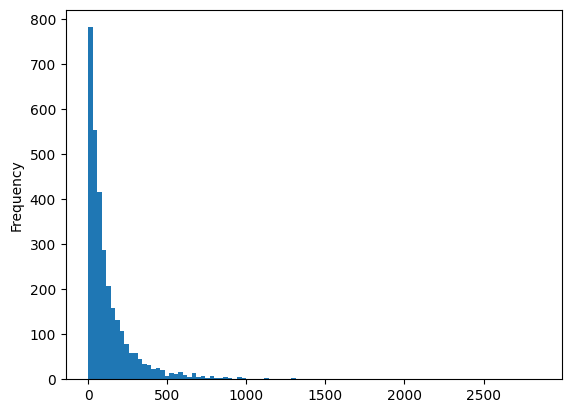

In [102]:
reviews_df['length'].plot(bins= 100, kind= 'hist')

In [103]:
reviews_df.length.describe()

count    3149.000000
mean      132.090187
std       182.114569
min         1.000000
25%        30.000000
50%        74.000000
75%       165.000000
max      2851.000000
Name: length, dtype: float64

In [104]:
# Let's see the message with mean length 
reviews_df[reviews_df['length'] == 133]['verified_reviews'].iloc[0]

'Fun item to play with and get used to using.  Sometimes has hard time answering the questions you ask, but I think it will be better.'

In [105]:
positive = reviews_df[reviews_df["feedback"]== 1]
positive

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [106]:
negative = reviews_df[reviews_df["feedback"]== 0]
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


<Axes: ylabel='Frequency'>

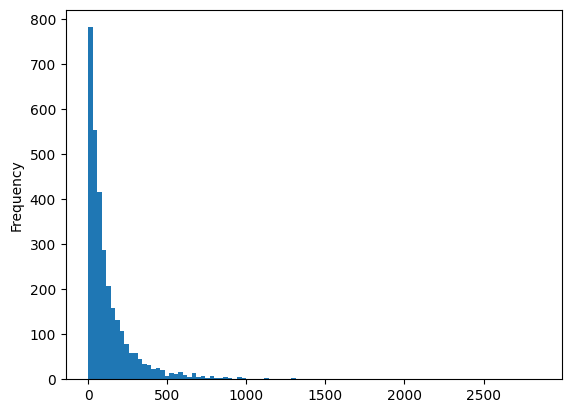

In [107]:
reviews_df['length'].plot(bins=100, kind='hist') 

<Axes: ylabel='count'>

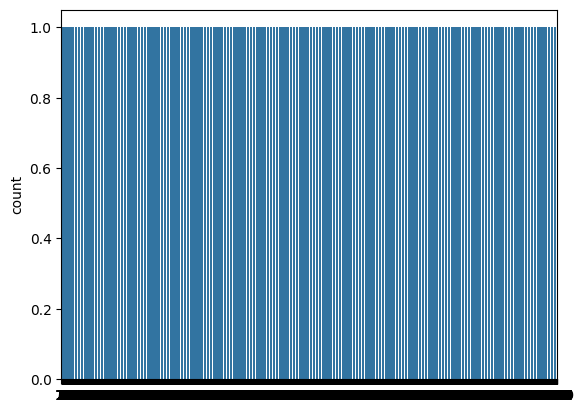

In [108]:
sns.countplot(reviews_df['feedback'], label = "Count") 

<Axes: xlabel='rating', ylabel='count'>

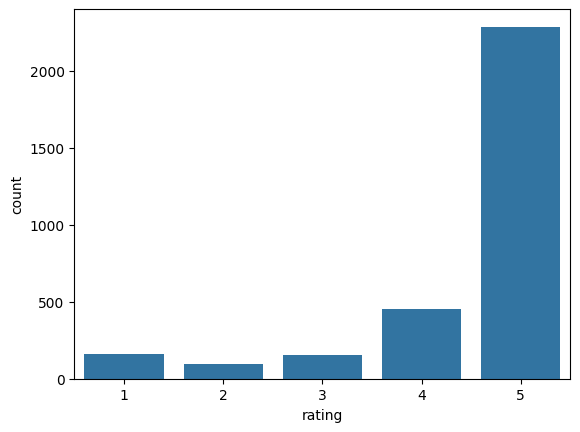

In [109]:
sns.countplot(x = 'rating', data= reviews_df)

In [110]:
reviews_df['rating'].values

array([5, 5, 4, ..., 5, 5, 4])

C:\Users\iamni\AppData\Local\Temp\ipykernel_9896\1106997803.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'variation', y ='rating', data = reviews_df, palette = 'deep')


<Axes: xlabel='variation', ylabel='rating'>

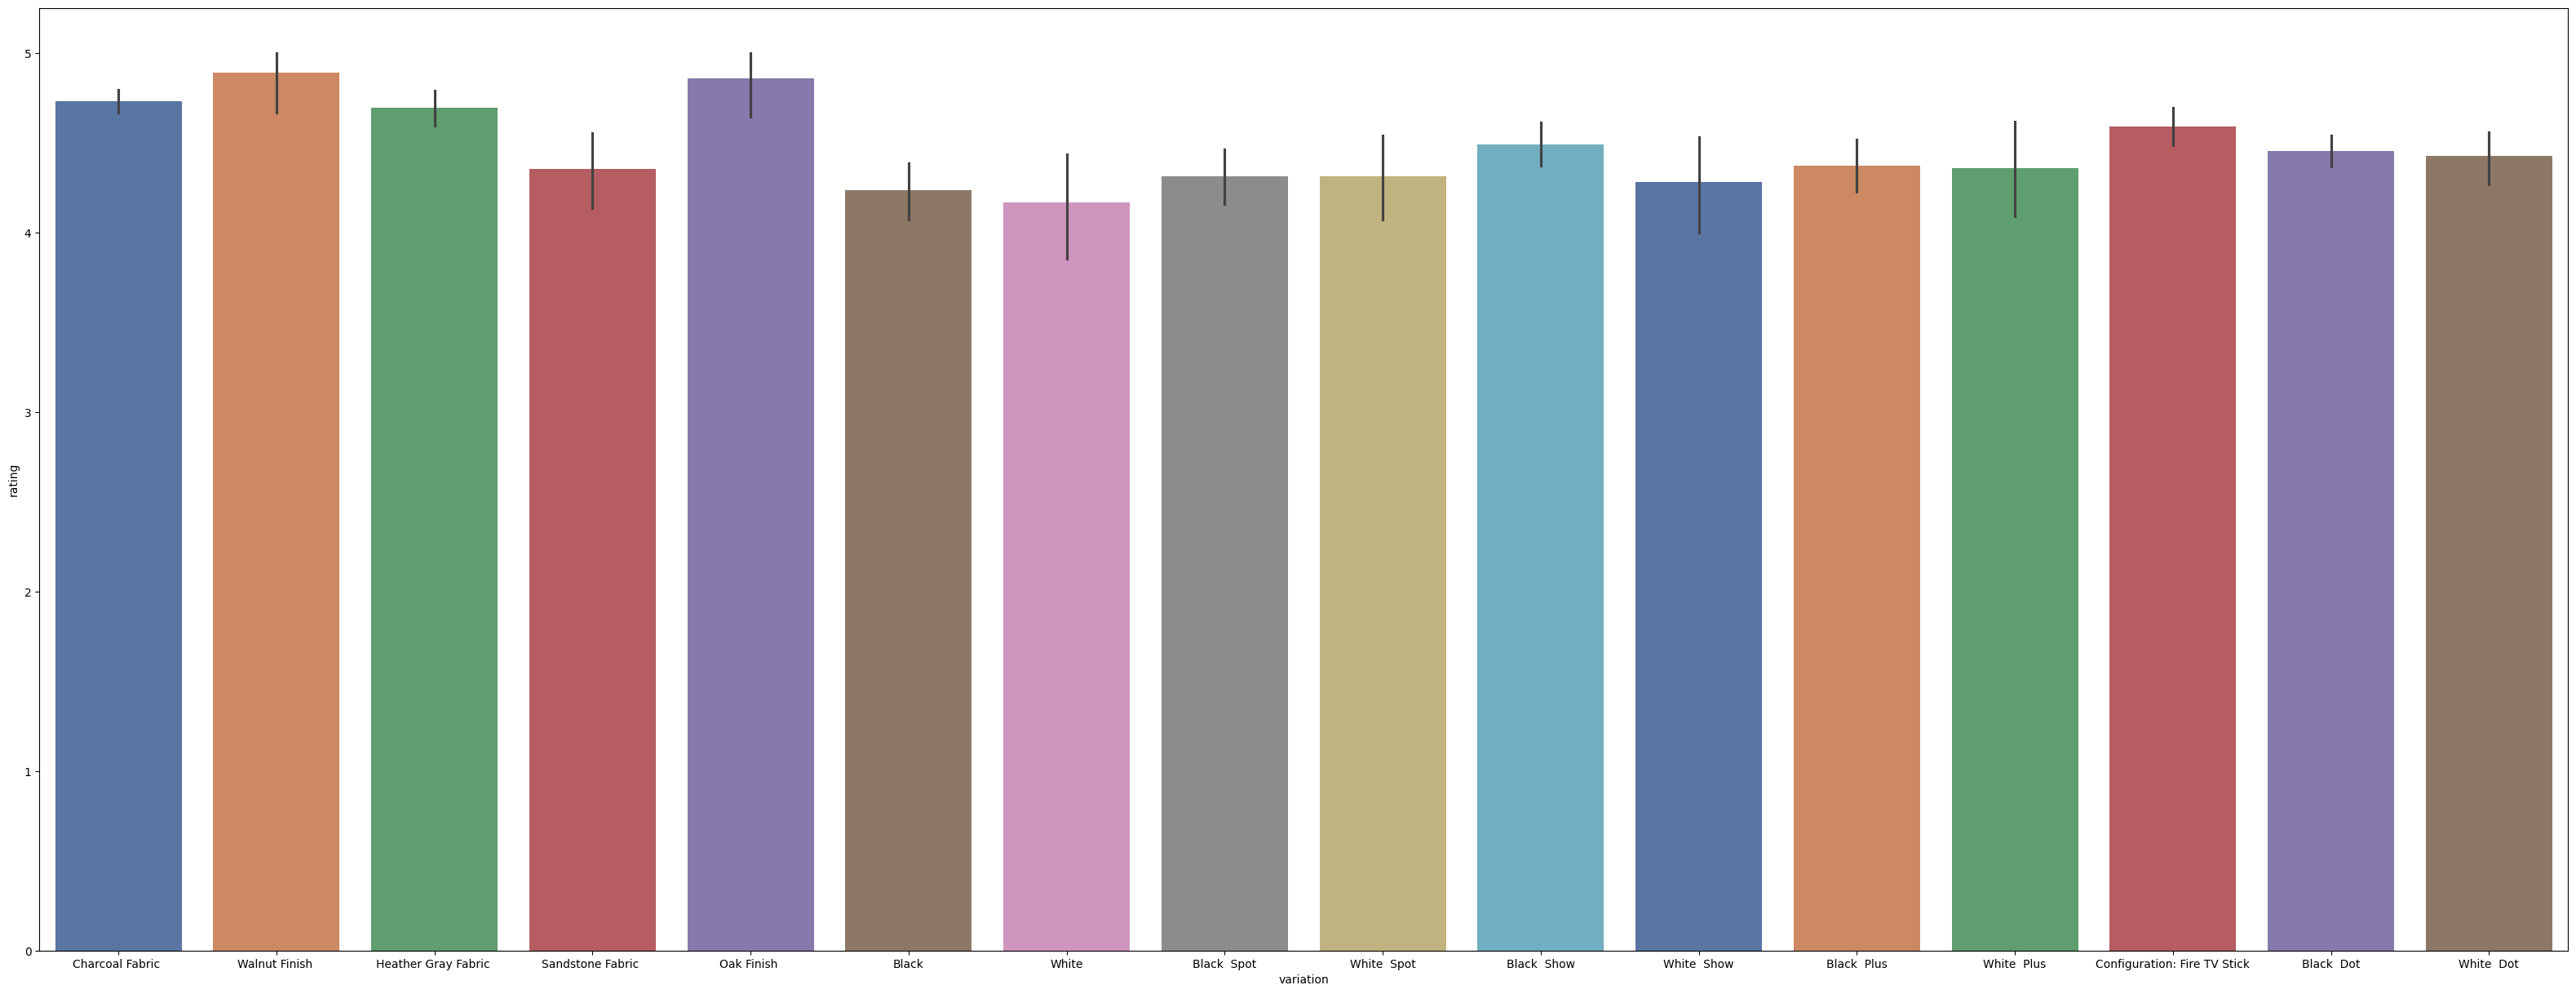

In [111]:
plt.figure(figsize = (40,15))
sns.barplot(x = 'variation', y ='rating', data = reviews_df, palette = 'deep')

In [112]:
sentences = reviews_df['verified_reviews'].tolist()


In [113]:
mega_sentence = " ".join(sentences)

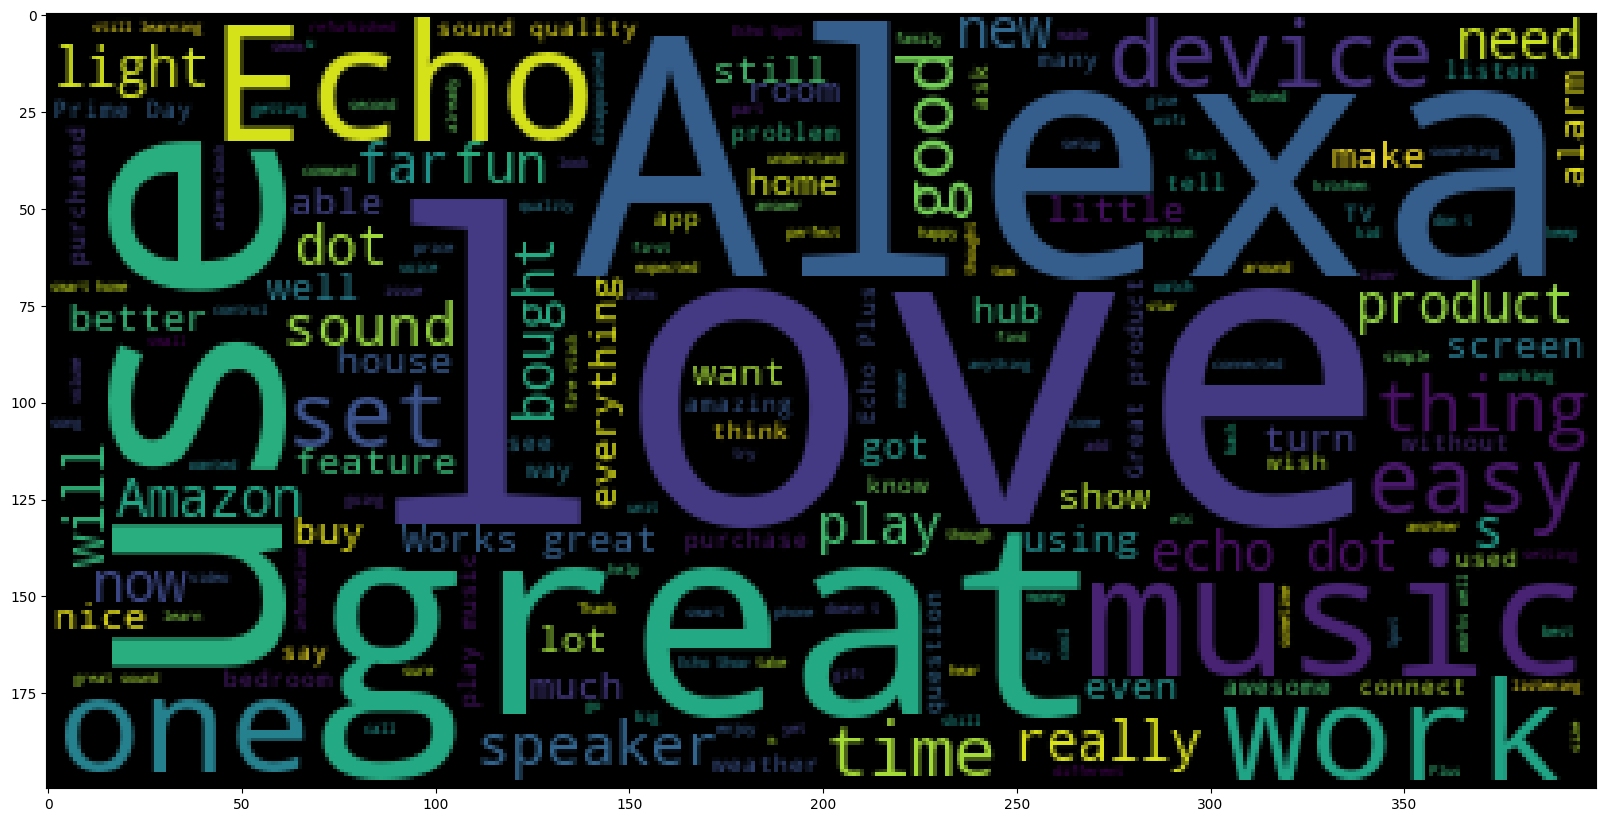

In [114]:
from wordcloud import WordCloud
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(mega_sentence))

In [115]:
negative_sentences= negative['verified_reviews'].tolist()
mega_neg_sen= " ".join(negative_sentences)

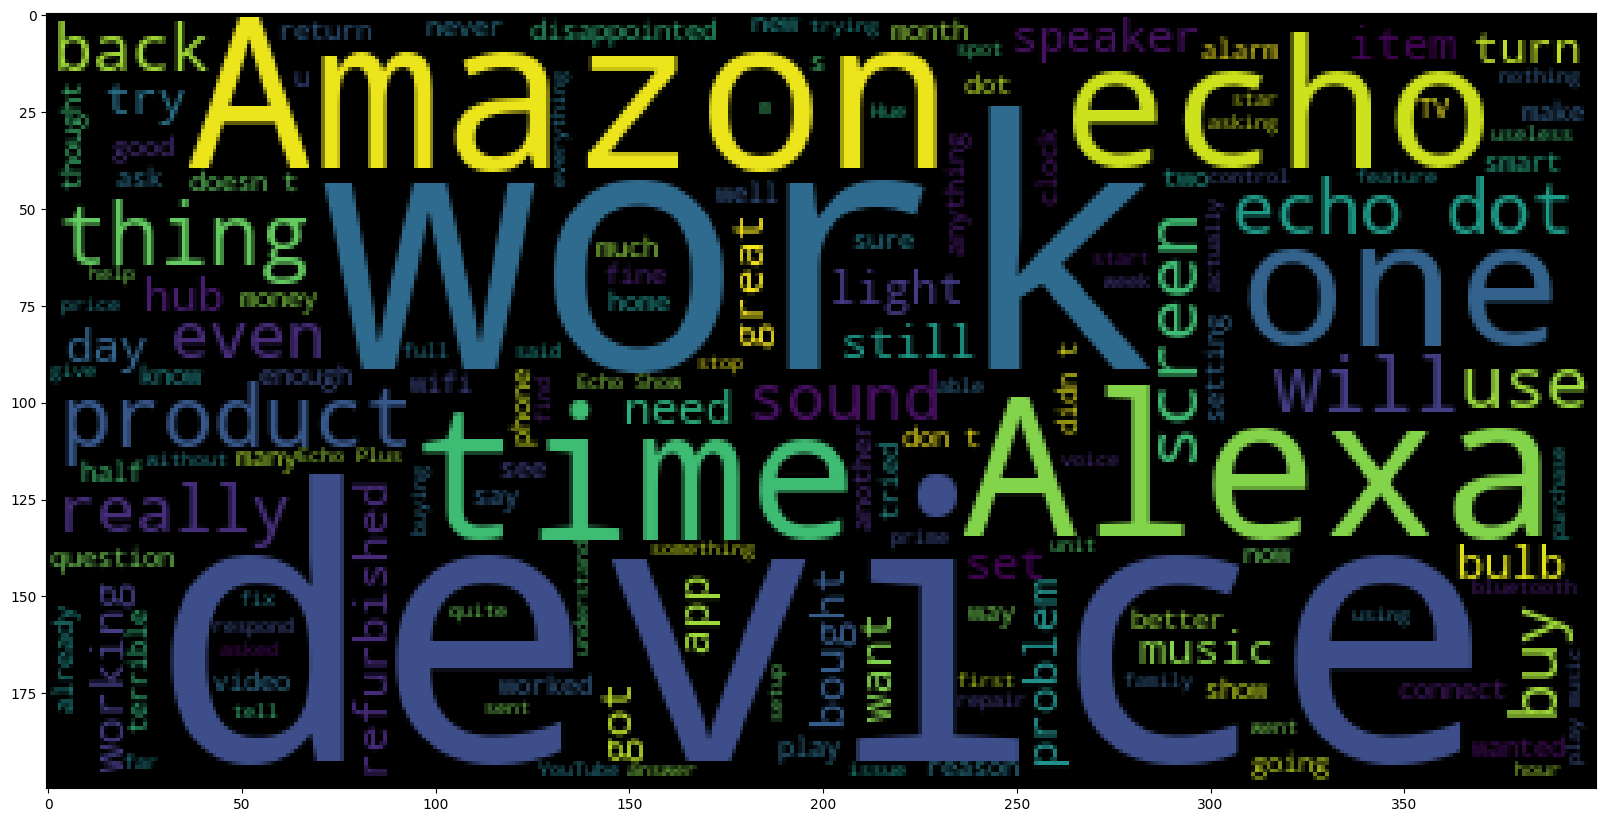

In [116]:
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(mega_neg_sen))

### Data Cleaning

In [118]:
# Let's drop the date
reviews_df = reviews_df.drop(['date', 'rating', 'length'], axis = 1)
reviews_df

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1
...,...,...,...
3145,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,Black Dot,"Listening to music, searching locations, check...",1
3147,Black Dot,"I do love these things, i have them running my...",1
3148,White Dot,Only complaint I have is that the sound qualit...,1


In [119]:
variation_dummies = pd.get_dummies(reviews_df['variation'], drop_first = True)

In [120]:
#dropping the column
reviews_df.drop(['variation'], axis = 1, inplace= True)

In [121]:
# adding the encoded column again
reviews_df = pd.concat([reviews_df, variation_dummies], axis = 1)

In [122]:
#Removing punctuations and stopwords from text
# Performing tokenization

import string
from nltk.corpus import stopwords # Natural Language tool kit 
from sklearn.feature_extraction.text import CountVectorizer

In [123]:
# function to remove punctuations and stopwords

def reviews_cleaning(reviews):
    reviews_punc_removed = [char for char in reviews if char not in string.punctuation]
    reviews_punc_removed_join = "".join(reviews_punc_removed)
    reviews_clean = [word for word in reviews_punc_removed_join.split() if word.lower()
                     not in stopwords.words('english') ]
    return reviews_clean

In [124]:
vectorizer = CountVectorizer(analyzer = reviews_cleaning)
reviews_vectorized = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [125]:
vectorizer.get_feature_names_out()

array(['072318', '1', '10', ..., '😬', '😳', '🤓'], dtype=object)

In [126]:
reviews_vectorized.shape

(3149, 5211)

In [127]:
#dropping the column

reviews_df.drop(['verified_reviews'], axis= 1, inplace= True)

In [128]:
reviews = pd.DataFrame(reviews_vectorized.toarray())
reviews

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
reviews_df = pd.concat([reviews_df, reviews], axis= 1)
reviews_df

,feedback,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,1.0,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,False,False,False,False,True,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3146,1.0,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3147,1.0,True,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3148,1.0,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3149,1.0,True,False,False,False,False,False,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [147]:
reviews_df.dropna(inplace=True)

In [149]:
# dropping  the target label coloumns

X = reviews_df.drop(['feedback'], axis= 1)
y = reviews_df['feedback']

In [151]:
X.columns = X.columns.astype(str)

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

#### Naive Bayes Classifier

In [155]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

#### ASSESSING TRAINED MODEL PERFORMANCE

In [157]:
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
y_train_predict = NB_classifier.predict(X_train)

<Axes: >

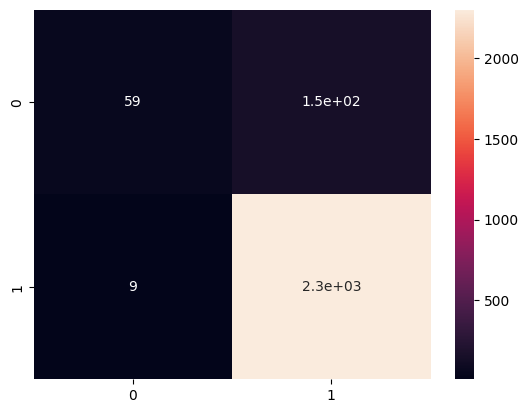

In [161]:
cm = confusion_matrix(y_train, y_train_predict)
sns.heatmap(cm, annot=  True)

<Axes: >

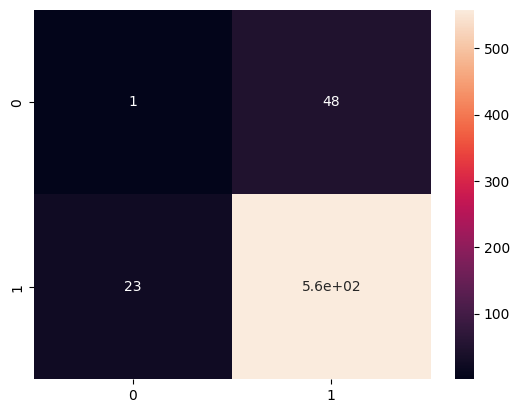

In [163]:
y_test_predict =  NB_classifier.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_predict)
sns.heatmap(cm_test, annot= True)

In [165]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

         0.0       0.04      0.02      0.03        49
         1.0       0.92      0.96      0.94       581

    accuracy                           0.89       630
   macro avg       0.48      0.49      0.48       630
weighted avg       0.85      0.89      0.87       630



#### Testing with Linear Regression

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [170]:
log_reg= LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [171]:
y_log_pred= log_reg.predict(X_test)
y_log_pred

array([1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [174]:
print('accuracy = {}%'.format(100*accuracy_score(y_test, y_log_pred)))

accuracy = 91.74603174603175%


<Axes: >

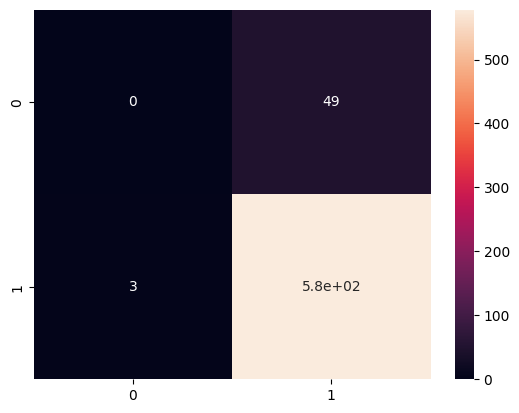

In [176]:
cm = confusion_matrix(y_test, y_log_pred)
sns.heatmap(cm, annot= True)

In [178]:
print(classification_report(y_test, y_log_pred))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        49
         1.0       0.92      0.99      0.96       581

    accuracy                           0.92       630
   macro avg       0.46      0.50      0.48       630
weighted avg       0.85      0.92      0.88       630

